# UTKFaces - CV Project

Team name: / Team members: Angelika Führer, if20b090@technikum-wien.at Chiara Babiak, if20b061@technikum-wien.at Clemens Rinner, if20b279@technikum-wien.at

The chosen dataset of this group : Labelled Images of Faces (https://susanqq.github.io/UTKFace/)

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pandas as pd
import collections

## Task 1 : Load Image Dataset

To later work with/access the Data easier we created 3 Lists:
- age_list
- gender_list
- images

To get the first two labels of each datapoint/image we only had to segment the title:
- The labels of each face image is embedded in the file name, formated like
=> [age][gender][race]_[date&time].jpg
[age] is an integer from 0 to 116, indicating the age [gender] is either 0 (male) or 1 (female) [race] is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern). [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace

In [2]:
import os
folder = "faces/crop_part1/"
files = os.listdir(folder)

In [137]:
age_list=[]
gender_list=[]
ethnicity_list = []
images=[]

for file in files:
        age=int(file.split('_')[0])
        gender=int(file.split('_')[1])
        ethnicity = int(file.split('_')[2])
        # append age and gender to list to create an agelist and genderlist to later check the balance of the dataset
        age_list.append(age)
        gender_list.append(gender)
        ethnicity_list.append(ethnicity)

        total=folder+'/'+file
        print(total)
        image=cv2.imread(total)
        image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        images.append(image)


faces/crop_part1//100_1_0_20170110183726390.jpg.chip.jpg
faces/crop_part1//100_1_2_20170105174847679.jpg.chip.jpg
faces/crop_part1//101_1_2_20170105174739309.jpg.chip.jpg
faces/crop_part1//10_0_0_20161220222308131.jpg.chip.jpg
faces/crop_part1//10_0_0_20170103200329407.jpg.chip.jpg
faces/crop_part1//10_0_0_20170103200522151.jpg.chip.jpg
faces/crop_part1//10_0_0_20170103233459275.jpg.chip.jpg
faces/crop_part1//10_0_0_20170104013211746.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110215927291.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220033115.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220111082.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220235233.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220251986.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220255346.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220316298.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220403810.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220447314.jpg.chip.jpg
faces/crop_part1//10_0_0_20170110220503946.jp

ValueError: invalid literal for int() with base 10: '20170109142408075.jpg.chip.jpg'

In [4]:
#shows that all images are already resized to 200
for img in images:
    print(img.shape)

print(type(images))

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 

## Task 0.1 : Description of Datset

Generally the Dataset consists of labelled Images, which have the labels of age, gender, ethnicity and date&time of when the Image was collected/added to the Dataset. Images themselves are taken from the internet and are therefore not coming from a private collection or database leading to them being labelled by the DEX algorithm and double-checked by a human annotator.

All in all there are about 20000 images available in the Set which show different poses and facial expressions of various age/gender/ethnicity groupings.

In our case: age, gender and ethnicity are the three most important features for the model and general working conditions of the dataset.

For such a diverse Dataset it is important for it to be balanced enough so that each feature is represented in the same amount according to the size of the Dataset.

Before we take a look at some of the available images, lets see how much each label is represented in our dataset. To do so we have previously created the age, gender and ethnicity list.

In [138]:
# since the steps are always the same a function has been created
def create_dict(feature_list, feature):
    counter = collections.Counter(feature_list)
    dictionary = {f"{feature}": counter.keys(), "count": counter.values()}
    return dictionary

### Age DF
First lets start with the age dictionary. So lets create a dictionary with how a frequency of each mentioned age - this dictionary will later be converted to a dataframe since it is better to work with

In [139]:
age_df = pd.DataFrame(create_dict(age_list, "age"))
age_df

,age,count
0,100,2
1,101,1
2,10,140
3,110,2
4,11,63
5,12,106
6,13,75
7,14,137
8,15,143
9,16,212


### Gender DF
We will repeat those steps again for this dataframe.

In [185]:
gender_df = pd.DataFrame(create_dict(gender_list,"gender"))
gender_df.sort_values('gender',inplace=True)
gender_df.reset_index(inplace=True)
gender_df.drop('index', axis=1, inplace=True)
gender_df

,gender,count
0,0,3525
1,1,4353


since gender is only represented as numerical values, for representation sakes we will change them to "female" and "male"

In [186]:
gender_df = gender_df.replace(0,'male')
gender_df = gender_df.replace(1,'female')
gender_df

,gender,count
0,male,3525
1,female,4353


### Ethnicity DF
Same with the gender features the labels are numerical so after creating the dictionary we will again change the col names accordingly.

- is an integer from 0 to 4, denoting White, Black, Asian, Indian, and Others (like Hispanic, Latino, Middle Eastern)

In [165]:
ethnicity_df = pd.DataFrame(create_dict(ethnicity_list, "ethnicity"))
ethnicity_df.reset_index(inplace=True, level=['ethnicity'])
ethnicity_df

,ethnicity,count
0,0,3849
1,2,1388
2,1,311
3,3,1302
4,4,1028


In [181]:
ethnicity_df = pd.DataFrame(create_dict(ethnicity_list, "ethnicity"))
ethnicity_df = ethnicity_df.sort_values('ethnicity')
# replace index needed to fetch name of predicted class later
ethnicity_df.reset_index(inplace=True)
ethnicity_df.drop('index', axis=1, inplace=True)
ethnicity_df

,ethnicity,count
0,0,3849
1,1,311
2,2,1388
3,3,1302
4,4,1028


In [182]:
ethnicity_df = ethnicity_df.replace(0,'White')
ethnicity_df = ethnicity_df.replace(1,'Black')
ethnicity_df = ethnicity_df.replace(2,'Asian')
ethnicity_df = ethnicity_df.replace(3,'Indian')
ethnicity_df = ethnicity_df.replace(4,'Others')
ethnicity_df

,ethnicity,count
0,White,3849
1,Black,311
2,Asian,1388
3,Indian,1302
4,Others,1028


### Statistical Visualization of Dataset

Since a written description of a dataset is good as well a visualization is even better. As mentioned before it is important to know how balanced a Dataset is, since that will influence the performance of our model. Therefore we will mostly visualize that

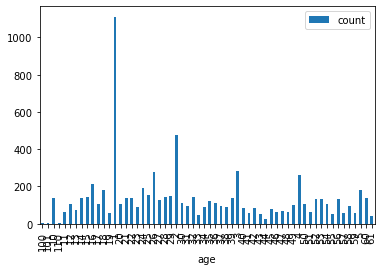

In [121]:
# age data
age_df.plot(x="age", y="count", kind='bar')
plt.show()

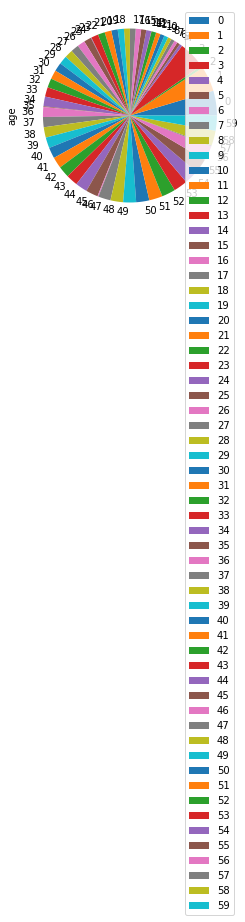

In [122]:
# age data
age_df.plot(x="count", y="age", kind='pie')
plt.show()

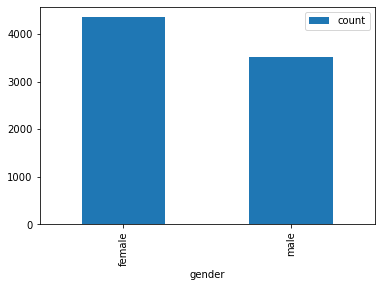

In [123]:
# gender data
gender_df.plot(x="gender", y="count", kind='bar')
plt.show()

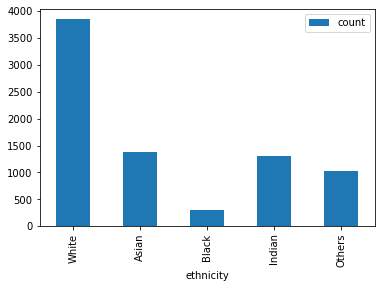

In [11]:
# ethnicity data
ethnicity_df.plot(x="ethnicity", y="count", kind='bar')
plt.show()

### Conclusion:

- One can see that by far the most represented ethnicity in this DataSet is white, meaning the model will not be accurate enough for other ethnicities.
- We have a slight imbalance between female and male
- When looking at the ages we see that there are also occurances of an imbalance depening on the age group we are focusing on

## Task 2 : Visualize the Dataset

0


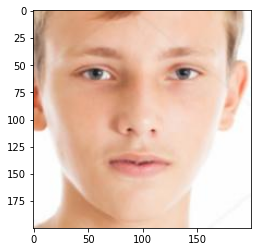

In [94]:
plt.imshow(images[9])
print(gender_list[9])

In [12]:
print(len(images), type(images))
print(len(age_list))
print(len(gender_list))
print(range(len(age_list)))

7878 <class 'list'>
7878
7878
range(0, 7878)


In [15]:
images_np=np.array(images)
ages_np=np.array(age_list)
genders_np=np.array(gender_list)
ethnicity_np = np.array(ethnicity_list)

print(genders_np)
print(ethnicity_np)

[1 1 1 ... 1 1 1]
[0 2 2 ... 0 0 0]


## Task 3 : Train Test Split

#### Split for Gender Classification
First we will create a model for gender classification by using the gender numpy array as label/y

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images_np, genders_np, test_size=0.2, train_size=0.8, random_state=4)

#### Split for Ethnicity Classification
Now we will use ethnicity_np to classify the ethnicity of the images

In [132]:
X_train_ethnicity, X_test_ethnicity, y_train_ethnicity, y_test_ethnicity = train_test_split(images_np, ethnicity_np, test_size=0.2, train_size=0.8, random_state=4)

## Task 4 : CNN Model

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Gender Classification

best batch size seems to be 64
try out adding resize to 128

In [50]:
# images are already cropped: image size = 200
num_classes = 2

model = keras.Sequential([
# Add the preprocessing layers
    layers.Resizing(128,128),
    layers.Rescaling(1./255),               #rescale
    layers.RandomFlip("horizontal_and_vertical"),   #data augmentation
    layers.RandomRotation(0.2),                     #data augmentation
    #layers.Conv2D(16, 3, padding='same', activation='relu'),
    #layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),            #prevent overfitting
    layers.Dense(num_classes)
])

In [51]:
# view training and validation accuracy for each training epoch by passing the metrics argument to model.compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [52]:
#train for 5 epochs, batch_size = 32
epochs=5
history = model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,      # number of samples processed before the model is updated
    verbose="auto",     # setting display of the training progress for each epoch
    epochs=epochs,       # number of complete passes through the training dataset
    validation_data=(X_test, y_test)
)

Epoch 1/5
197/197 [==============================] - 64s 318ms/step - loss: 0.6377 - accuracy: 0.6373 - val_loss: 0.6163 - val_accuracy: 0.6802
Epoch 2/5
197/197 [==============================] - 64s 324ms/step - loss: 0.5990 - accuracy: 0.6738 - val_loss: 0.5588 - val_accuracy: 0.7043
Epoch 3/5
197/197 [==============================] - 68s 347ms/step - loss: 0.5747 - accuracy: 0.6947 - val_loss: 0.5678 - val_accuracy: 0.7011
Epoch 4/5
197/197 [==============================] - 65s 331ms/step - loss: 0.5616 - accuracy: 0.7082 - val_loss: 0.5392 - val_accuracy: 0.7253
Epoch 5/5
197/197 [==============================] - 65s 331ms/step - loss: 0.5483 - accuracy: 0.7185 - val_loss: 0.5095 - val_accuracy: 0.7360


In [49]:
#train for 10 epochs, batch_size = 64
#new
epochs=10
history2 = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,      # number of samples processed before the model is updated
    verbose="auto",     # setting display of the training progress for each epoch
    epochs=epochs,       # number of complete passes through the training dataset
    validation_data=(X_test, y_test)
)

Epoch 1/10
99/99 [==============================] - 56s 570ms/step - loss: 0.4949 - accuracy: 0.7555 - val_loss: 0.4952 - val_accuracy: 0.7538
Epoch 2/10
99/99 [==============================] - 54s 541ms/step - loss: 0.4892 - accuracy: 0.7620 - val_loss: 0.4760 - val_accuracy: 0.7595
Epoch 3/10
99/99 [==============================] - 53s 538ms/step - loss: 0.4825 - accuracy: 0.7609 - val_loss: 0.4541 - val_accuracy: 0.7798
Epoch 4/10
99/99 [==============================] - 54s 542ms/step - loss: 0.4661 - accuracy: 0.7723 - val_loss: 0.4906 - val_accuracy: 0.7659
Epoch 5/10
99/99 [==============================] - 53s 538ms/step - loss: 0.4611 - accuracy: 0.7688 - val_loss: 0.4922 - val_accuracy: 0.7379
Epoch 6/10
99/99 [==============================] - 52s 528ms/step - loss: 0.4550 - accuracy: 0.7672 - val_loss: 0.4843 - val_accuracy: 0.7513
Epoch 7/10
99/99 [==============================] - 52s 527ms/step - loss: 0.4489 - accuracy: 0.7769 - val_loss: 0.4364 - val_accuracy: 0.7900

In [53]:
#train for 30 epochs, batch_size = 64
epochs=30
history3 = model.fit(
    x=X_train,
    y=y_train,
    batch_size=64,      # number of samples processed before the model is updated
    verbose="auto",     # setting display of the training progress for each epoch
    epochs=epochs,       # number of complete passes through the training dataset
    validation_data=(X_test, y_test)
)

Epoch 1/30
99/99 [==============================] - 61s 617ms/step - loss: 0.5238 - accuracy: 0.7353 - val_loss: 0.4922 - val_accuracy: 0.7557
Epoch 2/30
99/99 [==============================] - 60s 602ms/step - loss: 0.5119 - accuracy: 0.7425 - val_loss: 0.4851 - val_accuracy: 0.7525
Epoch 3/30
99/99 [==============================] - 60s 609ms/step - loss: 0.5100 - accuracy: 0.7402 - val_loss: 0.4796 - val_accuracy: 0.7557
Epoch 4/30
99/99 [==============================] - 61s 616ms/step - loss: 0.5050 - accuracy: 0.7426 - val_loss: 0.4804 - val_accuracy: 0.7646
Epoch 5/30
99/99 [==============================] - 60s 608ms/step - loss: 0.4921 - accuracy: 0.7493 - val_loss: 0.4616 - val_accuracy: 0.7709
Epoch 6/30
99/99 [==============================] - 61s 620ms/step - loss: 0.4948 - accuracy: 0.7479 - val_loss: 0.4614 - val_accuracy: 0.7640
Epoch 7/30
99/99 [==============================] - 60s 606ms/step - loss: 0.4846 - accuracy: 0.7534 - val_loss: 0.4636 - val_accuracy: 0.7773

### Ethnicity Classification

In [54]:
# images are already cropped: image size = 200
num_classes = 5


model_ethnicity = keras.Sequential([
# Add the preprocessing layers
    layers.Resizing(128,128),
    layers.Rescaling(1./255),               #rescale
    layers.RandomFlip("horizontal_and_vertical"),   #data augmentation
    layers.RandomRotation(0.2),                     #data augmentation
    #layers.Conv2D(16, 3, padding='same', activation='relu'),
    #layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),            #prevent overfitting
    layers.Dense(num_classes)
])

In [55]:
# view training and validation accuracy for each training epoch by passing the metrics argument to model.compile
model_ethnicity.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
#train for 10 epochs, batch_size = 64
epochs=10
history_ethnicity = model_ethnicity.fit(
    x=X_train_ethnicity,
    y=y_train_ethnicity,
    batch_size=64,      # number of samples processed before the model is updated
    verbose="auto",     # setting display of the training progress for each epoch
    epochs=epochs,       # number of complete passes through the training dataset
    validation_data=(X_test_ethnicity, y_test_ethnicity)
)

Epoch 1/10
99/99 [==============================] - 61s 601ms/step - loss: 1.3545 - accuracy: 0.4733 - val_loss: 1.2844 - val_accuracy: 0.5108
Epoch 2/10
99/99 [==============================] - 60s 605ms/step - loss: 1.3118 - accuracy: 0.4848 - val_loss: 1.3330 - val_accuracy: 0.4930
Epoch 3/10
99/99 [==============================] - 60s 604ms/step - loss: 1.2814 - accuracy: 0.4867 - val_loss: 1.2061 - val_accuracy: 0.5216
Epoch 4/10
99/99 [==============================] - 61s 613ms/step - loss: 1.2570 - accuracy: 0.4935 - val_loss: 1.2188 - val_accuracy: 0.5203
Epoch 5/10
99/99 [==============================] - 61s 616ms/step - loss: 1.2500 - accuracy: 0.5003 - val_loss: 1.1890 - val_accuracy: 0.5203
Epoch 6/10
99/99 [==============================] - 61s 615ms/step - loss: 1.1801 - accuracy: 0.5403 - val_loss: 1.1065 - val_accuracy: 0.5876
Epoch 7/10
99/99 [==============================] - 61s 613ms/step - loss: 1.1389 - accuracy: 0.5573 - val_loss: 1.0672 - val_accuracy: 0.6072

## Evaluate the model

In [57]:
#gender
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.37682101130485535
Test accuracy: 0.8274111747741699


In [58]:
#ethnicity
score_ethnicity = model_ethnicity.evaluate(X_test_ethnicity, y_test_ethnicity, verbose=0)
print('Test loss:', score_ethnicity[0])
print('Test accuracy:', score_ethnicity[1])

Test loss: 0.9220099449157715
Test accuracy: 0.6497461795806885


## Predict output for X_test

In [59]:
#gender
y_pred = model.predict(
    X_test
)
print(y_pred)

50/50 [==============================] - 4s 69ms/step
[[ 0.17924647 -0.5129318 ]
 [ 1.0150619  -0.5834773 ]
 [ 2.517601   -2.8685477 ]
 ...
 [ 0.2348356  -0.4917388 ]
 [-2.3663728   2.4869342 ]
 [ 0.11511808 -0.22119433]]


In [60]:
#ethnicity
y_pred_ethnicity = model_ethnicity.predict(
    X_test_ethnicity
)
print(y_pred_ethnicity)

50/50 [==============================] - 3s 67ms/step
[[ 2.9931319  -2.0912263  -2.18618     1.9429816   0.5781766 ]
 [ 2.5471308  -1.5890987  -0.1833144  -0.6615236  -0.05907052]
 [ 1.2744665  -0.89163095 -0.7050609   0.29727498  0.2598555 ]
 ...
 [ 1.9928511  -0.92929405 -1.6375011   0.48105934  0.24747936]
 [ 1.9166347  -1.4400775  -0.4621485  -0.27734905  0.47353816]
 [ 1.1675951  -0.22363059 -0.14210151 -0.44747916  0.33030018]]


In [187]:
def show_single_image_prediction(image_index):
    print("Original Gender:", y_test[image_index], "    |   Original Ethnicity:", y_test_ethnicity[image_index])
    print("Gender Label:", gender_df.gender[y_test[image_index]], "    |    Ethnicity Label:", ethnicity_df.ethnicity[y_test_ethnicity[image_index]])

    # expand array shape
    img_g = np.expand_dims(X_test[image_index], axis = 0)
    img_e = np.expand_dims(X_test_ethnicity[image_index], axis = 0)

    # gender prediction by model "model"
    pred_gender_prob = model.predict(img_g)
    gender_class = pred_gender_prob.argmax(axis=-1)                 # sequential model returns probability for each class -> argmax for fetching class label
    pred_gender = gender_df.gender[gender_class[0]]                 # use dataframe for displaying the name of the class, gender_class[0] because otherwise                                                                     gender_class is an array - not suitable as index

    # ethnicity prediction by model "model_ethnicity"
    pred_ethnicity_prob = model_ethnicity.predict(img_e)
    ethnicity_class = pred_ethnicity_prob.argmax(axis=1)            # sequential model returns probability for each class -> argmax for fetching class label
    pred_ethnicity = ethnicity_df.ethnicity[ethnicity_class[0]]     # use dataframe for displaying the name of the class
    print("Predicted Gender (probabilities) :", pred_gender_prob, "   |   Predicted Ethnicity (probabilities):", pred_ethnicity_prob)
    print("Predicted Gender:", pred_gender, "   |   Predicted Ethnicity:", pred_ethnicity)
    plt.axis('off')
    plt.imshow(X_test[image_index])

Original Gender: 0     |   Original Ethnicity: 0
Gender Label: male     |    Ethnicity Label: White
1/1 [==============================] - 0s 22ms/step
Predicted Gender (probabilities) : [[ 0.35302112 -0.30360284]]    |   Predicted Ethnicity (probabilities): [[ 3.3566256  -2.2386954  -0.7232631  -0.26373145  0.49911582]]
Predicted Gender: male    |   Predicted Ethnicity: White


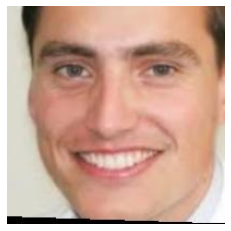

In [188]:
show_single_image_prediction(28)

Original Gender: 1     |   Original Ethnicity: 1
Gender Label: female     |    Ethnicity Label: Black
1/1 [==============================] - 0s 32ms/step
Predicted Gender (probabilities) : [[-1.322402  0.771181]]    |   Predicted Ethnicity (probabilities): [[ 0.92916673  2.41983    -2.674063    1.91434     0.6219239 ]]
Predicted Gender: female    |   Predicted Ethnicity: Black


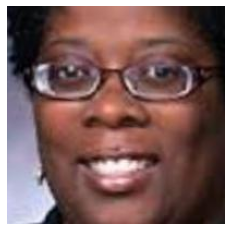

In [189]:
show_single_image_prediction(24)

Original Gender: 1     |   Original Ethnicity: 4
Gender Label: female     |    Ethnicity Label: Others
1/1 [==============================] - 0s 38ms/step
Predicted Gender (probabilities) : [[-2.6663625  2.5646677]]    |   Predicted Ethnicity (probabilities): [[ 0.4172387  -0.4387902  -0.6187007   0.7839029   0.66238225]]
Predicted Gender: female    |   Predicted Ethnicity: Indian


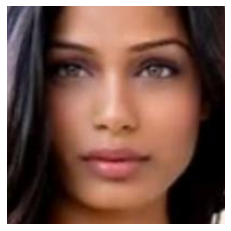

In [190]:
show_single_image_prediction(100)

## Task 0.2: How does the project relate to real applications?

## Task 0.3: Which problems did you encounter and how did you solve them?